In [177]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import netCDF4
import h5py

import datetime as dt
from datetime import datetime
import pyproj

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from pyproj import Proj, transform
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import torch

from scipy.interpolate import griddata

import cdsapi
import xarray as xr
from urllib.request import urlopen

from urllib.request import urlretrieve

import pickle

%load_ext autoreload
%autoreload 2

from functions import *
from models import *
# from torch_model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
sector = "Ross"
c = 1
laps = 4
files = glob.glob(f'D:\\IS2_topo_DL\\data\\Data_{sector}_*.pkl')
xx, yy, inputs, outputs = read_grid_input(files, c)

ann_input, ann_output = make_mlp_input(inputs, outputs, laps = laps)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.41it/s]


Grid files are read!
MLP dataset is ready for lap time 4


In [27]:
train_input, val_input, train_output, val_output = train_test_split(ann_input, ann_output, test_size=0.3, random_state=42)

In [6]:
n_samples, in_channels = train_input.shape

In [23]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(train_input, train_output)

In [50]:
model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [51]:
model.fit(train_input[:10], train_output[:10])


SVR(C=100, gamma=0.1)

In [52]:
train_pred = np.zeros(train_output.shape)
train_pred[:, :] = model.predict(train_input)

ValueError: could not broadcast input array from shape (67727,) into shape (67727,1)

In [47]:
model = linear_model.LinearRegression()
# poly = PolynomialFeatures(degree=2)
# train_input = poly.fit_transform(train_input)
# val_input = poly.fit_transform(val_input)

In [49]:
model.fit(train_input, train_output)

train_pred = np.zeros(train_output.shape)
train_pred[:, :] = model.predict(train_input)

In [38]:
RMSE(train_pred, train_output)

MemoryError: Unable to allocate 34.2 GiB for an array with shape (67727, 67727, 1) and data type float64

In [ ]:
plt.scatter(train_pred, train_output, alpha = 0.01)

In [182]:
train_input, val_input, train_output, val_output = train_test_split(ann_input, ann_output, test_size=0.3, random_state=42)
    
train_input = torch.tensor(train_input, dtype=torch.float32)
train_output = torch.tensor(train_output, dtype=torch.float32)
val_input = torch.tensor(val_input, dtype=torch.float32)
val_output = torch.tensor(val_output, dtype=torch.float32)

In [184]:
train_output.shape

torch.Size([58051, 1])

In [173]:
lstm = nn.LSTM(9, 64, num_layers = 4, batch_first = True)

In [174]:
batch = train_input[:16]
output, (h, c) = lstm(batch)
x = output.contiguous() #.view(-1, 1, 64*8)

In [176]:
val_output.shape

torch.Size([38702, 1, 1])

In [172]:
x

tensor([[[ 0.0093,  0.0208, -0.0256,  ...,  0.0449, -0.0446,  0.0176],
         [ 0.0092,  0.0343, -0.0342,  ...,  0.0638, -0.0632,  0.0259],
         [ 0.0069,  0.0425, -0.0361,  ...,  0.0714, -0.0714,  0.0293],
         [ 0.0046,  0.0474, -0.0355,  ...,  0.0744, -0.0756,  0.0305]],

        [[ 0.0093,  0.0208, -0.0256,  ...,  0.0449, -0.0446,  0.0176],
         [ 0.0092,  0.0344, -0.0342,  ...,  0.0638, -0.0632,  0.0259],
         [ 0.0069,  0.0426, -0.0360,  ...,  0.0713, -0.0714,  0.0293],
         [ 0.0047,  0.0474, -0.0354,  ...,  0.0743, -0.0756,  0.0305]],

        [[ 0.0093,  0.0208, -0.0256,  ...,  0.0449, -0.0446,  0.0176],
         [ 0.0092,  0.0344, -0.0342,  ...,  0.0638, -0.0632,  0.0259],
         [ 0.0070,  0.0427, -0.0361,  ...,  0.0712, -0.0713,  0.0293],
         [ 0.0047,  0.0475, -0.0356,  ...,  0.0742, -0.0755,  0.0305]],

        ...,

        [[ 0.0093,  0.0208, -0.0256,  ...,  0.0449, -0.0446,  0.0176],
         [ 0.0092,  0.0343, -0.0341,  ...,  0.0638, -0.06

In [191]:
model = LSTM(9, 1, laps=laps,features=64, hidden_layers = 4)

In [192]:
a = model(train_input[:16])

In [195]:
train_input.size()

torch.Size([58051, 4, 9])

In [210]:
np.mean([3,4,5,6])

4.5

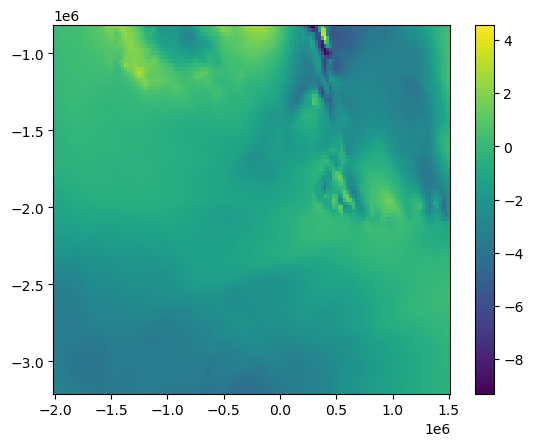

In [209]:
plt.pcolormesh(xx, yy, inputs[40, 4])
plt.colorbar()

In [3]:
sector = "Ross"
c = 1
laps = 4
files = glob.glob(f'D:\\IS2_topo_DL\\data\\Data_{sector}_*.pkl')
xx, yy, inputs, outputs = read_grid_input(files, c)

row0, col0 = xx.shape

w = 96

xx = xx[row0//2-w//2:row0//2+w//2, col0//2-w//2:col0//2+w//2]
yy = yy[row0//2-w//2:row0//2+w//2, col0//2-w//2:col0//2+w//2]
inputs = inputs[:, :, row0//2-w//2:row0//2+w//2, col0//2-w//2:col0//2+w//2]
outputs = outputs[:, :, row0//2-w//2:row0//2+w//2, col0//2-w//2:col0//2+w//2]

ann_input, ann_output = make_cnn_input(inputs, outputs, laps = laps)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.96it/s]


Grid files are read!


100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:06<00:00, 25.87it/s]

CNN dataset is ready for lap time 4


In [16]:
loss_fn = ref_loss()

In [7]:
train_input, val_input, train_output, val_output = train_test_split(ann_input, ann_output, test_size=0.3, random_state=42)
    
train_input = torch.tensor(train_input, dtype=torch.float32)
train_output = torch.tensor(train_output, dtype=torch.float32)
val_input = torch.tensor(val_input, dtype=torch.float32)
val_output = torch.tensor(val_output, dtype=torch.float32)

print(train_input.shape, train_output.shape)

torch.Size([109, 36, 96, 96]) torch.Size([109, 1, 96, 96])


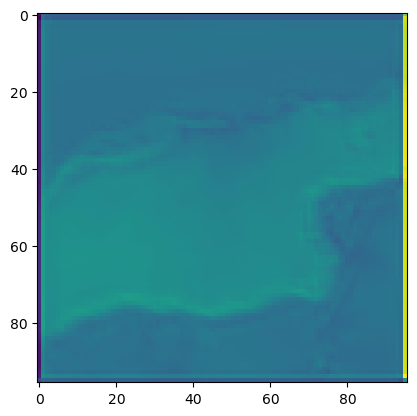

In [15]:
plt.imshow(y[0, 0].detach().numpy())

In [8]:
model = CNN(36, 1, 16)

In [18]:
y = model(train_input[:8])

In [19]:
loss_fn(train_output[:8], y)

tensor(0.0146, grad_fn=<DivBackward0>)

In [66]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 14625


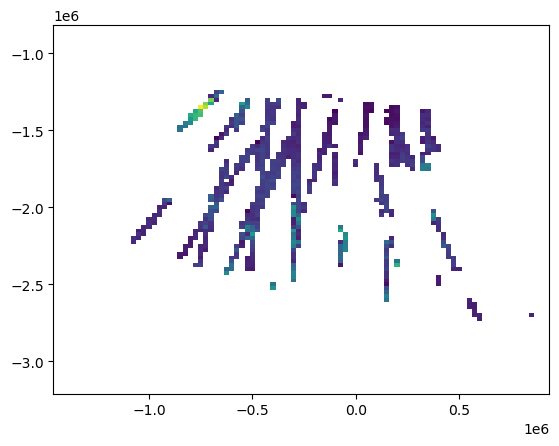

In [84]:
plt.pcolormesh(xx, yy, train_output[6, 0])

In [ ]:
class encoder(nn.Module):
    def __init__(self, ch1, ch2, k=3):
        super(encoder,self).__init__()
        self.activation = nn.Tanh() #nn.LeakyReLU(0.1) #nn.Tanh() #nn.ReLU() #nn.Tanh() #nn.LeakyReLU(0.1)
        self.e11 = nn.Conv2d(ch1, ch2, kernel_size=k, padding="valid") # output: 320x320x64
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 160x160x64

    def forward(self, x):
        x = self.activation(self.e11(x))
        x = self.pool1(x)
        return x


class CNN(nn.Module):
    def __init__(self, ch_inputs, ch_outputs, features=32, hidden_layers = 4, row = 100, col = 100, kernel = 3):
        super(CNN, self).__init__()

        self.conv1 = encoder(ch_inputs, features)
        self.conv2 = encoder(features, features)
        self.conv3 = encoder(features, features)

    def forward(self, in_feat):

        x = self.conv1(in_feat)
        x = self.conv2(x)
        x = self.conv3(x)
        
        return x

In [ ]:

test = torch.tensor()


modules = [nn.Conv2d(ch_inputs, features, kernel, padding = "valid")]
for i in range(hidden_layers):
    modules.append(nn.Conv2d(n_filters, n_filters, kernel, padding = "valid"))
    modules.append(nn.LeakyReLU())
    modules.append(nn.MaxPool2d(2, 2))
    row = row
    col = col

modules.append(nn.Linear(16 * 5 * 5, 120), features)
modules.append(nn.Linear(features, ch_outputs))
modules.append(nn.ReLU())
self.conv = nn.Sequential(*modules)

In [3]:
import dgl.data
dataset = dgl.data.GINDataset('MUTAG', False)

C:\Users\yoko2261\.dgl\GINDataset.zip: 100%|██████████████████████████████████████| 33.4M/33.4M [00:02<00:00, 16.4MB/s]


Extracting file to C:\Users\yoko2261\.dgl\GINDataset


In [11]:
dataset[:][1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
laps = 4

n_samples, var_ip, row, col = np.shape(inputs)
_, var_op, _, _ = np.shape(outputs)

inputs[np.isnan(inputs)] = 0
# outputs[np.isnan(outputs)] = 0

first = True
for n in tqdm(range(0, n_samples-laps)):
    # sic = inputs[n+laps, 2, :, :]
    # valid = np.where((sic > 0.8) & (outputs[n+laps, 0] > 0) & (outputs[n+laps, 0] <= 1) & (mask))

    # n_valid = valid[0].shape[0]

    ann_input0 = np.zeros([1, var_ip * laps, row, col])
    ann_output0 = np.zeros([1, var_op, row, col])
    
    for v in range(0, var_ip):
        for i in range(0, laps):
            ann_input0[0, v*laps+i] = normalize_input(inputs[n+i, v], v)
    for v in range(0, var_op):
        ann_output0[0, v] = outputs[n+laps, v]

    if first:
        ann_input = ann_input0
        ann_output = ann_output0
        first = False
    else:
        ann_input = np.concatenate((ann_input, ann_input0), axis = 0)
        ann_output = np.concatenate((ann_output, ann_output0), axis = 0)

100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:12<00:00, 12.80it/s]


In [ ]:
c = 1
laps = 4
sector = "Ross"
files = glob.glob(f'D:\\IS2_topo_DL\\data\\Data_{sector}_*.pkl')
xx, yy, inputs, outputs = read_grid_input(files, c)

In [ ]:
ann_input, ann_output = make_cnn_input(inputs, outputs, laps)

train_input, val_input, train_output, val_output = train_test_split(ann_input, ann_output, test_size=0.4, random_state=42)

# train_input = torch.tensor(train_input, dtype=torch.float32)
# train_output = torch.tensor(train_output, dtype=torch.float32)
# val_input = torch.tensor(val_input, dtype=torch.float32)
# val_output = torch.tensor(val_output, dtype=torch.float32)

# train_dataset = TensorDataset(train_input, train_output)
# train_loader = DataLoader(train_dataset, batch_size=batch_size)
# val_dataset = TensorDataset(val_input, val_output)
# val_loader = DataLoader(val_dataset, batch_size=batch_size)

# n_samples, in_channels = train_input.size()
# _, out_channels = train_output.size()
# print(f"##### TRAINING DATA IS PREPARED (Samples: {n_samples}; model: {args.model}) #####")

# features, hidden_layers = 128, 2
# net = MLP(in_channels, out_channels, features, hidden_layers)
# model_name = f"torch_{sector}_c{c}_lap{laps}_{args.model}_h{hidden_layers}_f{features}"
# print(model_name)

In [ ]:
ann_input, ann_output = make_mlp_input(inputs[:,:9], outputs[:,1:2], laps = laps)

In [ ]:
ann_

In [ ]:
train_input, val_input, train_output, val_output = train_test_split(ann_input, ann_output, test_size=0.6, random_state=42)

In [165]:
train_input.shape, train_output.shape, val_input.shape, val_output.shape

((19241, 36), (19241, 1), (28862, 36), (28862, 1))

In [144]:
n_samples = ann_input.shape[0]
torch.randint(0, n_samples, (int(n_samples),), generator=torch.Generator().manual_seed(42))

tensor([45704, 33665, 46001,  4086, 47870, 31433, 19332, 21047, 33313, 44429])

In [136]:
a1 = random_split(a, [0.5, 0.5], generator=torch.Generator().manual_seed(42))
b1 = random_split(b, [0.5, 0.5], generator=torch.Generator().manual_seed(42))

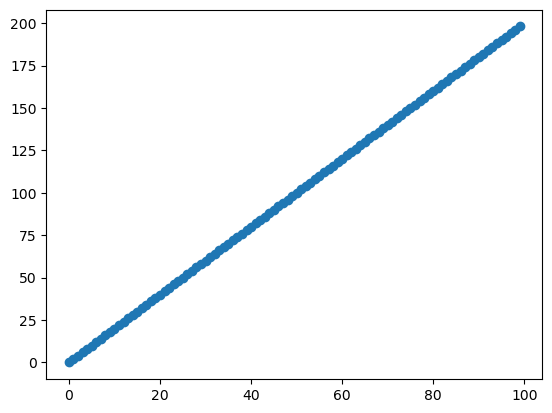

In [137]:
plt.scatter(a1, b1)

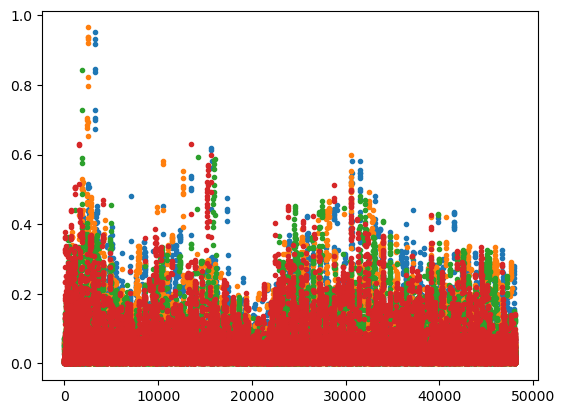

In [159]:
c = 8
plt.plot(ann_input[:, c*laps:(c+1)*laps], '.')

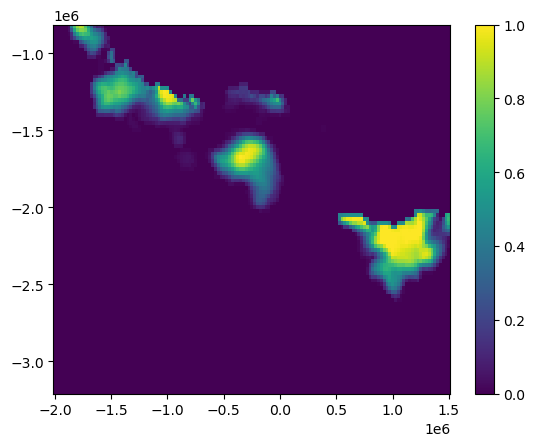

In [24]:
i = 60
c = 2
plt.pcolormesh(xx, yy, inputs[i, c])
plt.colorbar()

In [47]:
ds = retrieve_hourly_ERA5(year, ['04'], ['10', '11'])

2024-07-23 10:11:15,144 INFO Welcome to the CDS
2024-07-23 10:11:15,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 10:11:15,757 INFO Request is completed


In [67]:
months = ['04']
days = ['10', '11']
c = cdsapi.Client(quiet=True, debug=False)
# dataset to read
dataset = 'reanalysis-era5-single-levels'
# flag to download data
# download_flag = False
variables = [
    '10m_u_component_of_wind', '10m_v_component_of_wind', 'instantaneous_10m_wind_gust',
    '2m_temperature', 'sea_ice_cover', 'surface_pressure'
]

params = {
    'format': 'netcdf',
    'product_type': 'reanalysis',
    'variable': variables,
    'year':[str(year)],
    'month': months,
    'day': days,
    'time': ['12:00'],
    'grid': [1, 0.5],
    'area': [-50, -180, -90, 180]
    }

# retrieves the path to the file
fl = c.retrieve(dataset, params)

2024-07-23 10:38:13,641 INFO Welcome to the CDS
2024-07-23 10:38:13,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 10:38:13,949 INFO Request is completed


In [50]:
import inspect

In [53]:
inspect.getargspec(c.retrieve)

ArgSpec(args=['self', 'name', 'request', 'target'], varargs=None, keywords=None, defaults=(None,))

In [4]:
filepath = "D:\\IS2_topo_DL"
region = "Ross"
year = 2019

##### Read data ##############################
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass

ncname = filepath + f'\\Ridges_density_{region}_{year}.nc'
ds = xr.open_dataset(ncname)

with netCDF4.Dataset(ncname, 'r') as nc:
    lat = np.array(nc.variables['lat'])
    lon = np.array(nc.variables['lon'])
    x = np.array(nc.variables['x'])
    y = np.array(nc.variables['y'])
    xx, yy = np.meshgrid(x, y)

    times = nc.variables['time']
    times = num2date(times[:], units = times.units)

    hours = np.array(nc.variables['time']).astype(float)
    time_era = []

    for i in range(0, len(hours)):
        time_era.append(dt.datetime(1800, 1, 1) + dt.timedelta(hours = hours[i]))

date1, date2 = [], []
for m in range(1, 13):
    date1.append(dt.datetime(year,m,1))
    if m == 12:
        date2.append(dt.datetime(year+1,1,1))
    else:
        date2.append(dt.datetime(year,m+1,1))

fields = ['fb_mode']
output = np.zeros([len(fields), len(date1), xx.shape[0], xx.shape[1]])

for k, field1 in enumerate(fields):
    for i in range(0, len(date1)):                

        tidx = np.where((times >= date1[i]) & (times < date2[i]))[0]
        fb_count = np.nansum(np.array(ds.variables["fb_count"][tidx, :, :]), axis = 0)
        valid_count = (fb_count > 500)
        
        if np.sum(tidx) > 0:
            array = np.array(ds.variables[field1][tidx, :, :])
            # array = np.transpose(np.array(ds.variables[field1][tidx, :, :]), axes = (0, 2, 1))
            data1 = np.nanmedian(array, axis = 0)
            data1[~valid_count] = np.nan

        output[k, i] = np.transpose(np.nanmean(array, axis = 0))
        

In [7]:
output.shape

(1, 12, 96, 141)

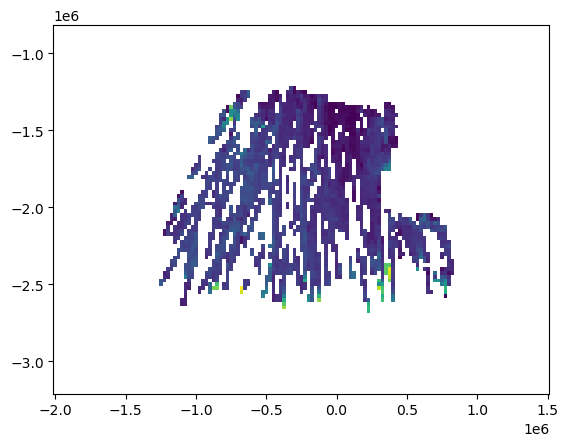

In [9]:
plt.pcolormesh(xx, yy, output[0, 4])

In [55]:
w = 1
ws = 2*w+1 # size of one width in the square
n_nodes = ws**2
xx, yy, inputs, outputs = read_grid_input(files, c)

# Input & output should be entire images for CNN
n_samples, var_ip, row, col = np.shape(inputs)
_, var_op, _, _ = np.shape(outputs)

first = True

if first:
    center = (ws)*w + w
    src = []
    dst = []
    # weight = []
    # slope = []

    for i in range(0, ws):
        for j in range(0, ws):
            src.append(i*ws + j)
            dst.append(center)

    src = torch.tensor(src)
    dst = torch.tensor(dst)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 24.56it/s]


Grid files are read!


In [56]:
src

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [59]:
n = 1
t = 2
v = 1
i = 50
j = 40
a = normalize_input(inputs[n+t, v, i-1:i+2, j-1:j+2], v)

In [63]:
a.flatten()

array([ 0.        , -0.9127264 , -0.98548444,  0.        , -0.87970957,
       -0.95790413,  0.        , -0.86783512, -0.94533696])

In [64]:
import dgl.data
dataset = dgl.data.GINDataset('MUTAG', False)

C:\Users\kooal\.dgl\GINDataset.zip: 100%|█████████████████████████████████████████| 33.4M/33.4M [00:01<00:00, 18.7MB/s]


Extracting file to C:\Users\kooal\.dgl\GINDataset


In [175]:
dataset = gnn_input(url = glob.glob(f'D:\\IS2_topo_DL\\data\\Data_{sector}_*.pkl'))

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 17.46it/s]


Grid files are read!


100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [01:46<00:00,  1.46it/s]


In [165]:
from dgl.data import split_dataset
from dgl.dataloading import GraphDataLoader
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
import time

In [178]:
batch_size = 16

train_set, val_set = split_dataset(dataset, frac_list=[0.7, 0.3], shuffle=True, random_state=42)
train_loader = GraphDataLoader(train_set, use_ddp=False, batch_size=batch_size, shuffle=True)
val_loader = GraphDataLoader(val_set, use_ddp=False, batch_size=batch_size, shuffle=True)

In [120]:
n_nodes = val_set[0][0].num_nodes()
in_channels = val_set[0][0].ndata['feat'].shape[1]
out_channels = 1

In [151]:
class GCN(nn.Module):
    def __init__(self, ch_input, ch_output, features = 128, hidden_layers = 4):
        super(GCN, self).__init__()

        modules = [GraphConv(ch_input, features)]

        for i in range(hidden_layers):
            modules.append(GraphConv(features, features))
            # modules.append(nn.LeakyReLU())

        self.gcn = dgl.nn.Sequential(*modules)
        self.lin = nn.Linear(features, ch_output)
        self.activation = nn.ReLU()

    
    def forward(self, g, in_feat):
        edge_weight = None #g.edata['weight'].type(torch.float32)
        h = self.gcn(g, in_feat, edge_weight)
        out = self.activation(self.lin(h))
        return out

features = 128
hidden_layers = 2
model = GCN(in_channels, out_channels, features, hidden_layers)

In [183]:
criterion = nn.MSELoss() #regional_loss() #nn.MSELoss() #nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), 0.01)
scheduler = ExponentialLR(optimizer, gamma=0.95)

total_params = sum(p.numel() for p in model.parameters())
device = "cpu"
# print(model_name)
print(f"Number of parameters: {total_params}")

history = {'loss': [], 'val_loss': [], 'time': []}
ti = time.time()

for epoch in range(10):
    t0 = time.time()
    model.train()
    # The line below ensures all processes use a different
    # random ordering in data loading for each epoch.
    
    ##### TRAIN ###########################
    train_loss = 0
    train_count = 0
    for bg, target in train_loader:
        bg = bg.to(device)
        feats = bg.ndata['feat']                
        pred = model(bg, feats)            
        loss = criterion(pred*100, target*100)
        train_loss += loss.cpu().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_count += 1
    scheduler.step()
    
    ##### VALIDATION ######################
    val_loss = 0
    val_count = 0
    for bg, target in val_loader:
        bg = bg.to(device)
        feats = bg.ndata['feat']                
        pred = model(bg, feats)            
        loss = criterion(pred*100, target*100)                
        val_loss += loss.cpu().item()
        val_count += 1
        
    history['loss'].append(train_loss/train_count)
    history['val_loss'].append(val_loss/val_count)
    history['time'].append(time.time() - ti)
    
    t1 = time.time() - t0

    if epoch % 1 == 0:            
        print('Epoch {0} >> Train loss: {1:.4f}; Val loss: {2:.4f} [{3:.2f} sec]'.format(str(epoch).zfill(3), train_loss/train_count, val_loss/val_count, t1))

Number of parameters: 37889
Epoch 000 >> Train loss: 86095.1369; Val loss: 239.5276 [64.76 sec]
Epoch 001 >> Train loss: 239.3287; Val loss: 239.2368 [64.84 sec]



KeyboardInterrupt



In [181]:
print('Epoch {0} >> Train loss: {1:.4f}; Val loss: {2:.4f} [{3:.2f} sec]'.format(str(epoch).zfill(3), train_loss/train_count, val_loss/val_count, t1))

Epoch 000 >> Train loss: 101.0475; Val loss: 83.6006 [71.86 sec]


In [154]:
for bg, target in tqdm(train_loader):
    bg = bg.to('cpu')
    bg = dgl.add_self_loop(bg)
    feats = bg.ndata['feat']                
    pred = model(bg, feats) 

100%|█████████████████████████████████████████████████████████████████████████████| 4233/4233 [00:37<00:00, 112.90it/s]
